# 3.3.7 Drill - Exploring the Central Limit Theorem

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
from scipy.stats import ttest_ind

Create two binomially distributed populations with n = 10 and size = 10000. 
pop1 p-value = 0.2 
pop2 p-value = 0.5 
Using a sample size of 100, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen. Discuss the results with your mentor.


In [21]:
# Create 2 binomially distributed populations with n=10 and size=10000
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

In [22]:
# Using a sample size of 100
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print('mean sample1 n=100: ' + str(np.mean(sample1)))
print('mean sample2 n=100: ' + str(np.mean(sample2)))
print('std sample1 n=100: ' + str(np.std(sample1)))
print('std sample2 n=100: ' + str(np.std(sample2)))

mean sample1 n=100: 1.94
mean sample2 n=100: 5.25
std sample1 n=100: 1.2232742946698423
std sample2 n=100: 1.82414363469547


#### 1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each.  Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

Prediction: I expect the standard deviation from the mean will overlap more when 1000 datapoints are included in the sample and overlap less when 20 datapoints are included in the sample. 

Observations:  The averages stayed close to the same but the standard deviations increased with n

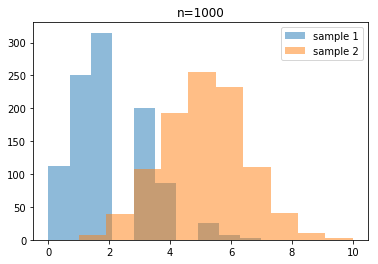

n=1000
mean sample1: 2.018
mean sample2: 5.074
std sample1: 1.284397134845761
std sample2: 1.5370504220746959
3.056


In [25]:
# Using a sample size of 1000
sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.title('n=1000')
plt.legend(loc='upper right') 
plt.show()

print('n=1000')
print('mean sample1: ' + str(np.mean(sample1)))
print('mean sample2: ' + str(np.mean(sample2)))
print('std sample1: ' + str(np.std(sample1)))
print('std sample2: ' + str(np.std(sample2)))

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

## 2. Adjust probability for pop1 to 0.3 and then 0.4. Take new samples and compute the t-statistic and p-value. What changes, and why?

Prediction: I think increasing the probability is also incresing the variance so the will be greater differences between each sample from the same population but given he central limit theorum they should still head towards the same average? - After playing with this more I realize its more about the two populations have similar composition. Given that the probability of the two populations are getting closer they should have more similar distributions, the t-value should go down and the 

Actual: the t-value shrinks and the p-value gets larger as the two samples become more similar. 

*t-value tells us how large the difference between two samples is relative to the amount of variance in the combined dataset? aka is there a meaningful difference in the means of the two samples? (higher number the more the two populatins are different)*

*the p-values tells us how likely we would get the two samples if they came from populations with the same mean. The lower the p-value the more confidently we can say there is a meaningful difference between the means of the two original populations
p-value closer to 1 - there will always be a difference of this size or greater in abscence or real population difference.*

In [27]:
# pop1 p = 0.3
pop1 = np.random.binomial(10, 0.3, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=10.534341684234382, pvalue=9.921886007348133e-21)


In [29]:
# pop1 p = 0.4
pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=3.384733970284061, pvalue=0.0008611428472002717)


## 3.  Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

Prediction: The sample mean values should still accurately represent the population mean if the size of the sample is adequate to represent the variance in the population.

Observation: Is this asking if the average of a sample will accurately represent the population average?
Or am i testing to see if the t-values will shrink again when the samples come from more similar populations?


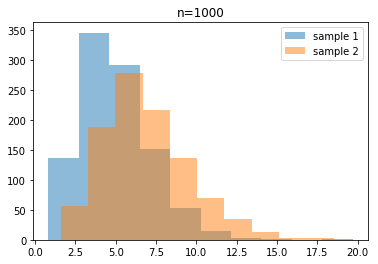

n=1000
mean pop1: 4.98332494116964
mean sample1: 4.963454218421262
mean pop2: 6.9758042294556155
mean sample2: 6.88612767396541
std sample1: 2.209221335179571
std sample2: 2.6583384669628614
1.9226734555441478
Ttest_indResult(statistic=17.58130738203123, pvalue=2.6401807038250965e-64)
None


In [33]:
# Using a sample size of 1000, create 2 populations of gamma
pop1 = np.random.gamma(5,1,10000)
pop2 = np.random.gamma(7,1,10000)

sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.title('n=1000')
plt.legend(loc='upper right') 
plt.show()

print('n=1000')
print('mean pop1: '+str(np.mean(pop1)))
print('mean sample1: ' + str(np.mean(sample1)))

print('mean pop2: '+str(np.mean(pop2)))
print('mean sample2: ' + str(np.mean(sample2)))

print('std sample1: ' + str(np.std(sample1)))
print('std sample2: ' + str(np.std(sample2)))

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)
print(print(ttest_ind(sample2, sample1, equal_var=False)))

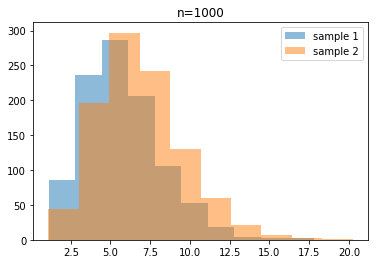

n=1000
mean pop1: 5.957307612136884
mean sample1: 5.761377565872836
mean pop2: 6.979470850730861
mean sample2: 6.905317485488995
std sample1: 2.4114318875792553
std sample2: 2.6625687150630606
1.1439399196161588
Ttest_indResult(statistic=10.065124230959997, pvalue=2.8306260763012773e-23)
None


In [34]:
# Using a sample size of 1000, create 2 populations of gamma
pop1 = np.random.gamma(6,1,10000)
pop2 = np.random.gamma(7,1,10000)

sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.title('n=1000')
plt.legend(loc='upper right') 
plt.show()

print('n=1000')
print('mean pop1: '+str(np.mean(pop1)))
print('mean sample1: ' + str(np.mean(sample1)))

print('mean pop2: '+str(np.mean(pop2)))
print('mean sample2: ' + str(np.mean(sample2)))

print('std sample1: ' + str(np.std(sample1)))
print('std sample2: ' + str(np.std(sample2)))

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)
print(print(ttest_ind(sample2, sample1, equal_var=False)))